# Actividad 9: Regresión 
### Cristina Ouzande A00827306

In [18]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

In [5]:
%ls 'antropometria-dataset.csv'

antropometria-dataset.csv


In [6]:
df= pd.read_csv('antropometria-dataset.csv')
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [26]:
model = sm.OLS.from_formula('peso ~ cintura', data = df)
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:56:24   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
cintura        0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(45, 150, 'Peso = -8.3137 + 0.8316*Cintura ')

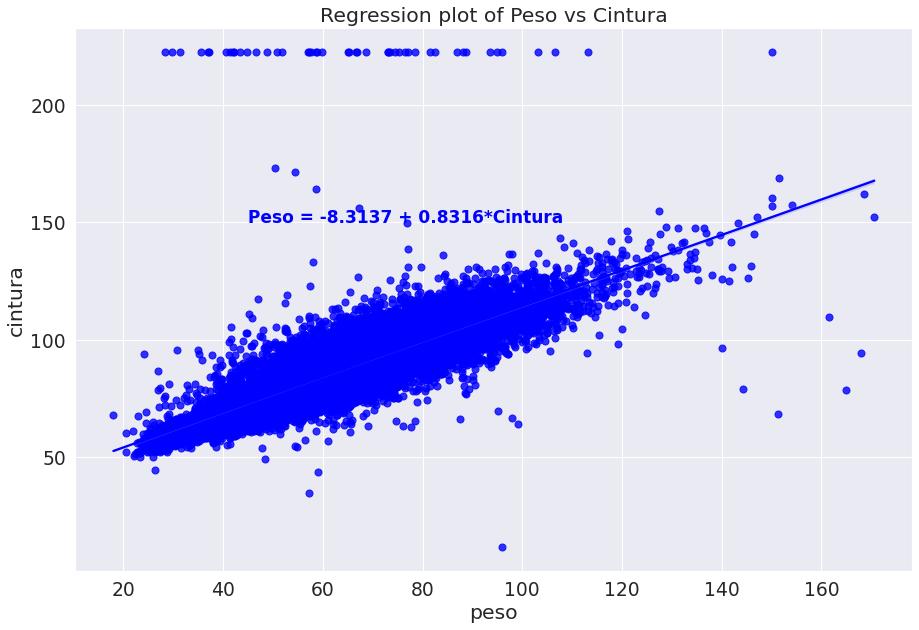

In [14]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1.7)

reg_plot = sns.regplot(x = 'peso',
            y = 'cintura',
            data = df,
            marker = '.',
            color = 'blue',
           scatter_kws = {'s':200}
           )
reg_plot.set_title('Regression plot of Peso vs Cintura')
reg_plot.text(45, 150, 'Peso = -8.3137 + 0.8316*Cintura ',
             color = 'blue',
             weight='semibold',
             size ='small')


In [27]:
x = result.fittedvalues
y = result.resid

Text(0, 0.5, 'residuales')

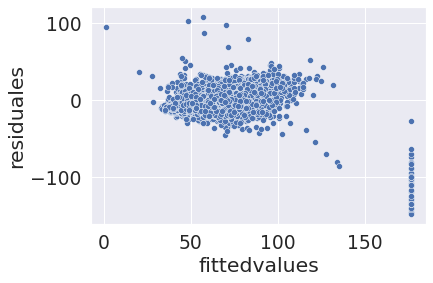

In [28]:
fig = sns.scatterplot ( x = x, y = y) 
fig.set_xlabel ('fittedvalues')
fig.set_ylabel ('residuales')

In [31]:
model2 = sm.OLS.from_formula('diastol ~ sistol', data = df)
result2 = model2.fit() 
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:03:21   Log-Likelihood:                -66351.
No. Observations:               18640   AIC:                         1.327e+05
Df Residuals:                   18638   BIC:                         1.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6843      0.432     54.811      0.000      22.837      24.531
sistol         0.4375      0.004    121.220      0.000       0.430       0.445
==============================================================================
Omnibus:                     1040.446   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.429
Skew:                           0.118   Prob(JB):                         0.00
Kurtosis:                       5.280   Cond. No.                         830.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
df.corr()

,folio,intp,entidad,sexo,edad,meses,peso,ropa,talla,cintura,cadera,sistol,diastol,PrimaryLast,est_dis,est_urb,est_marg,pondef,est_var
folio,1.000000,-0.017127,0.999979,0.010344,0.026894,0.014225,-0.044368,0.011953,-0.071853,-0.026543,-0.032166,0.003985,-0.018598,NaN,-0.094484,-0.107161,0.002257,0.010347,0.999845
intp,-0.017127,1.000000,-0.017200,0.046257,-0.636936,-0.006015,-0.374168,-0.007191,-0.144495,-0.421887,-0.321075,-0.340492,-0.278265,NaN,-0.006402,-0.000918,0.016604,0.042477,-0.017334
entidad,0.999979,-0.017200,1.000000,0.010380,0.027015,0.014288,-0.044406,0.011915,-0.071862,-0.026583,-0.032198,0.004068,-0.018564,NaN,-0.094805,-0.107293,0.001842,0.010179,0.999861
sexo,0.010344,0.046257,0.010380,1.000000,0.039906,-0.000934,-0.124461,-0.001227,-0.463303,0.014791,0.169966,-0.083550,-0.057971,NaN,0.002736,0.007622,-0.014616,-0.041621,0.010459
edad,0.026894,-0.636936,0.027015,0.039906,1.000000,0.003416,0.317050,0.018021,0.021070,0.478879,0.340062,0.535218,0.345657,NaN,-0.035563,-0.019963,-0.027559,0.037230,0.026532
meses,0.014225,-0.006015,0.014288,-0.000934,0.003416,1.000000,-0.004255,0.003584,0.008326,0.000214,0.000300,0.009473,-0.004480,NaN,0.001648,0.000554,-0.001311,0.015791,0.014309
peso,-0.044368,-0.374168,-0.044406,-0.124461,0.317050,-0.004255,1.000000,0.006378,0.556587,0.791677,0.777061,0.353440,0.358054,NaN,0.087096,0.112852,-0.106389,0.085659,-0.042902
ropa,0.011953,-0.007191,0.011915,-0.001227,0.018021,0.003584,0.006378,1.000000,-0.005135,0.007701,0.003628,0.055130,-0.012078,NaN,-0.024589,-0.037460,0.015826,-0.050711,0.011431
talla,-0.071853,-0.144495,-0.071862,-0.463303,0.021070,0.008326,0.556587,-0.005135,1.000000,0.245208,0.273173,0.142837,0.152398,NaN,0.085241,0.109504,-0.096508,0.097229,-0.070432
cintura,-0.026543,-0.421887,-0.026583,0.014791,0.478879,0.000214,0.791677,0.007701,0.245208,1.000000,0.863396,0.403265,0.362961,NaN,0.049018,0.071307,-0.067250,0.062563,-0.025732


In [33]:
model3 = sm.OLS.from_formula('diastol ~ sistol + edad + peso + cintura', data = df)
result3 = model3.fit() 
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3812.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:10:05   Log-Likelihood:                -63952.
No. Observations:               18032   AIC:                         1.279e+05
Df Residuals:                   18027   BIC:                         1.280e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3297      0.520     39.089      0.000      19.310      21.349
sistol         0.4140      0.004     94.447      0.000       0.405       0.423
edad          -0.0272      0.004     -6.934      0.000      -0.035      -0.020
peso           0.0825      0.006     14.154      0.000       0.071       0.094
cintura        0.0202      0.007      3.072      0.002       0.007       0.033
==============================================================================
Omnibus:                     1031.138   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.633
Skew:                           0.189   Prob(JB):                         0.00
Kurtosis:                       5.194   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
residual = result3.resid
residual

0        -0.305991
1        -3.244064
2       -13.914068
3        10.569038
4        -6.485321
           ...    
18635   -22.471261
18636   -40.108753
18637   -52.509166
18638   -22.551977
18639    23.456111
Length: 18032, dtype: float64

In [38]:
import statistics

In [39]:
statistics.median(residual)

-0.0021017816189328187

In [40]:
median(residual)

NameError: name 'median' is not defined

In [41]:
statistics.median(residual)

-0.0021017816189328187